## Problem statement


Mr. Son is currently involved with a research for the battery of an electric car, the nominal voltage might be 14 v. He measures the voltage of the new battery but each time he measured, the value was diffefent due to severe noise. So he decided to remove the noise in the measurement by Kalman filter. Measurement was sampled every 0.2 sec

### System Model
The current measure might be equal to the previous measure then the $t+1$ expected value might be, this could be expressed as 

\begin{equation}
x_{k+1} = x_{k}
\label{eq_system_model_1}
\end{equation}

Also, the current measure modeled by the input $z_k$ with a noise $v_k$

\begin{equation}
z_k = x_k + v_k
\end{equation}

The initial conditions might be given by 
\begin{align*}
x_0 & = 14\\
v_k & = N(0,2^2)
\end{align*}

#### Matrices (scalars) for the Kalman Filter


\begin{align*}
A & = 14\\
H & = 1\\
Q & = 0 \\
R & = 4
\end{align*}

**Note** If you do not have any information about the initial condition, set a large covariance, in this case is set to 4

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [26]:
dt = 0.2; 
t = np.arange(0,10+dt,dt)
#print(t)

time_span = {"time":t}

measures = np.arange(0,len(t))

data = pd.DataFrame({"sample":measures})
data["time"]= t

raw_signal = [14.4 + np.random.normal(0,1,1)[0] for value in data["time"]]
data["raw_signal"] = raw_signal
data['simpleKalman'] = np.zeros((data.shape[0],1))
data['lowPassFilter'] = np.zeros((data.shape[0],1))
data['K'] = np.zeros((data.shape[0],1))
data['P'] = np.zeros((data.shape[0],1))
data.head(10)

,sample,time,raw_signal,simpleKalman,lowPassFilter,K,P
0,0,0.0,14.170848,0.0,0.0,0.0,0.0
1,1,0.2,14.094232,0.0,0.0,0.0,0.0
2,2,0.4,13.766150,0.0,0.0,0.0,0.0
3,3,0.6,13.277524,0.0,0.0,0.0,0.0
4,4,0.8,14.306696,0.0,0.0,0.0,0.0
5,5,1.0,14.317686,0.0,0.0,0.0,0.0
6,6,1.2,13.980619,0.0,0.0,0.0,0.0
7,7,1.4,14.821244,0.0,0.0,0.0,0.0
8,8,1.6,13.865716,0.0,0.0,0.0,0.0
9,9,1.8,13.977970,0.0,0.0,0.0,0.0


#### Matrix initialization

In [27]:
A = np.array([1])
H = np.array([1])
Q = np.array([0])
R = np.array([4])
print(A)
print(H)
print(Q)
print(R)

[1]
[1]
[0]
[4]


In [28]:
for index in data["sample"]:

    if index == 0:
        x = 14
        P = 6
    else: 
        x = data.loc[index-1,"simpleKalman"]
        
    xp = A*x
    Pp = A*P*np.transpose(A) + Q
    
    K = Pp*H*1/(H*Pp*np.transpose(H) + R)
    data.loc[index,"simpleKalman"] = xp + K*(data.loc[index,"raw_signal"] - H*xp)
    P = Pp - K*H*Pp
    data.loc[index,"P"] = P
    data.loc[index,"K"] = K
    

In [29]:
alpha = 0.7

for index in data["sample"]:
    if index >= 1:
        previous_estimate = data.loc[index-1,"lowPassFilter"] 
    else:
        previous_estimate = data.loc[index,"raw_signal"]
        
    data.loc[index,"lowPassFilter"] = alpha*previous_estimate + (1 - alpha)*data.loc[index,"raw_signal"]
    

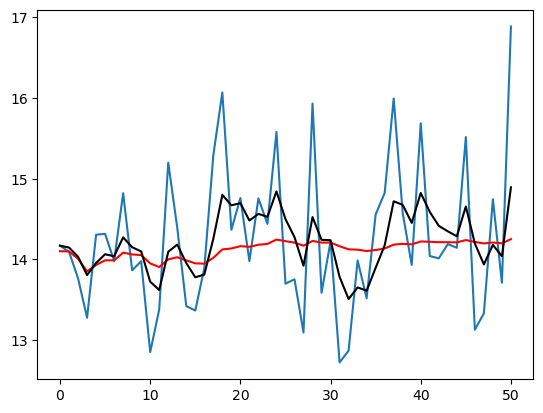

In [30]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(data["sample"],data["raw_signal"],label='sensor_data')
axes.plot(data["sample"],data["simpleKalman"],color='r', label="filtered signal")
axes.plot(data["sample"],data["lowPassFilter"], color="k")

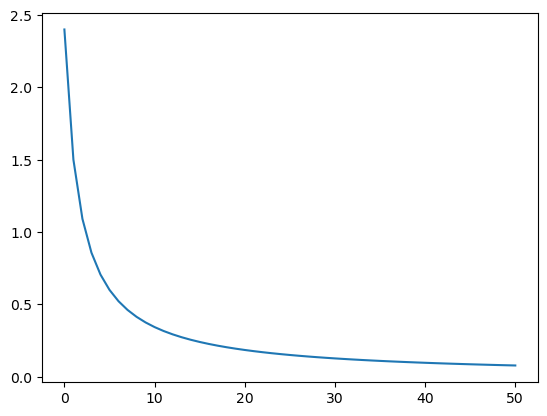

In [31]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(data["sample"],data["P"],label='sensor_data')

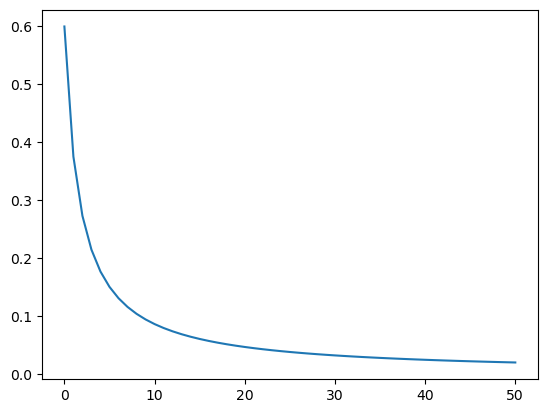

In [32]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(data["sample"],data["K"],label='sensor_data')

## Example 02

NameError: name 'np' is not defined